In [32]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import seaborn as sns
import pandas as pd

from scipy import stats
# logistic (or inverse-logit) is the inverse of the logit function
from scipy.special import expit as logistic

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

This is based on the [homework of week 6](https://github.com/rmcelreath/statrethinking_winter2019/blob/master/homework/week06.pdf) of Statistical Rethinking book material.
I do the homework based on the questions but not following a specific order.
<br>
<br>
The dataset can be found [here](https://github.com/rmcelreath/rethinking/blob/Experimental/data/)
<br>
<br>
"The data in NWOGrants are outcomes for scientific funding applications for the Netherlands Organization for Scientific Research (NWO) from 2010-2012 (see van der Lee and Ellemers doi:10.1073/pnas.1510159112)."

In [67]:
df = pd.read_csv('../data/NWOGrants.csv', sep=';')

# create categories for gender and discipline as it'll be required
# female = 1
# male = 0
df['gender_id'] = (df['gender']=='f').astype(int)
df['discipline_id'] = df['discipline'].astype('category').cat.codes
df

,discipline,gender,applications,awards,gender_id,discipline_id
0,Chemical sciences,m,83,22,0,0
1,Chemical sciences,f,39,10,1,0
2,Physical sciences,m,135,26,0,5
3,Physical sciences,f,39,9,1,5
4,Physics,m,67,18,0,6
5,Physics,f,9,2,1,6
6,Humanities,m,230,33,0,2
7,Humanities,f,166,32,1,2
8,Technical sciences,m,189,30,0,8
9,Technical sciences,f,62,13,1,8


## Effects of gender on grant awards
Total and indirect causal effects of gender on grant awards.

In [39]:
with pm.Model() as m1:
    a = pm.Normal('a', 0, 1.5, shape=len(df.gender_id.unique()))
    p = pm.math.invlogit(a[df.gender_id])
    
    awards = pm.Binomial('awards', n=df.applications, p=p, observed=df.awards)
    m1_trace = pm.sample()
    
    m1_data = az.from_pymc3(m1_trace)
    m1_prior = az.from_pymc3(prior=pm.sample_prior_predictive())

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Bellow we plot the priors.

array([[<AxesSubplot:title={'center':'a'}>]], dtype=object)

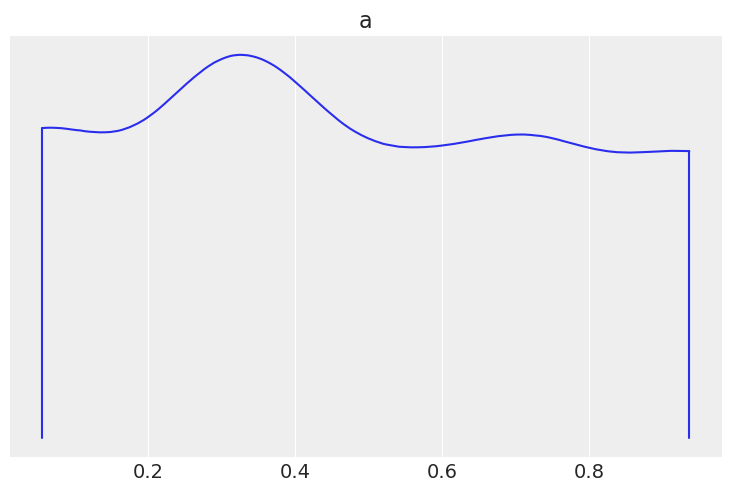

In [56]:
az.plot_density([logistic(m1_prior.prior.sel(a_dim_0=0))],
                var_names=["a"],
                group="prior",
                point_estimate=None,
               )

In [57]:
az.summary(m1_trace, round_to=2, kind="stats")

,mean,sd,hdi_3%,hdi_97%
a[0],-1.53,0.06,-1.65,-1.41
a[1],-1.74,0.08,-1.91,-1.60


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

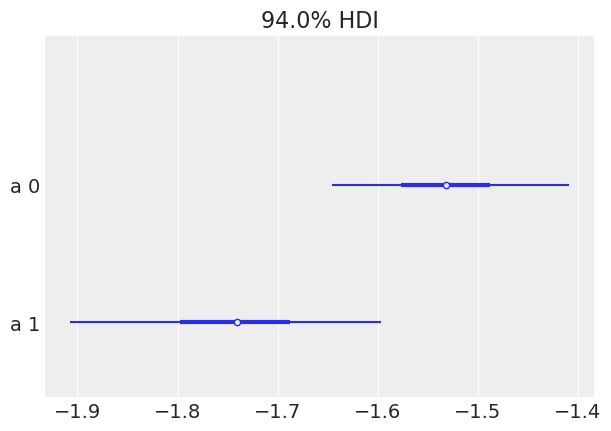

In [58]:
az.plot_forest([m1_trace], 
              var_names=["a"],
              combined=True)

In [ ]:
with pm.Model() as m2:
    awards = pm.Binomial('awards', n=df.applications, p=p, observed=df.awards) 

---
---

In [5]:
%load_ext watermark
%watermark -iv -v -nuw

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Thu Feb 04 2021

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

pandas    : 1.1.3
pymc3     : 3.9.3
scipy     : 1.5.2
matplotlib: 3.3.2
arviz     : 0.10.0
seaborn   : 0.11.0
numpy     : 1.19.2

Watermark: 2.1.0

